In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
from scipy import interpolate, fftpack, integrate, stats, sparse
from sys import path

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['scatter.marker'] = '.'

In [3]:
path.append('../../')
import derivative

In [4]:
def plot_example(diff_method, t, data_f, res_f, sigmas, y_label=None):
    '''
    Utility function for concise plotting of examples.
    '''
    fig, axes = plt.subplots(1, len(sigmas), figsize=[len(sigmas)*4, 3])
    
    # Compute the derivative
    res = diff_method.d(np.vstack([data_f(t, s) for s in sigmas]), t)
    for i, s in enumerate(sigmas):
        axes[i].plot(t, res[i])
        axes[i].plot(t, res_f(t))
        axes[i].set_title("Noise: $\sigma$={}".format(s))
    if y_label:
        axes[0].set_ylabel(y_label, fontsize=12)

# Usage

There are two ways to interact with the code.

In [5]:
t = np.linspace(0, 2, 50)
x = np.sin(2*np.pi*t)

The first way is to do a specific import of the desired Derivative object.

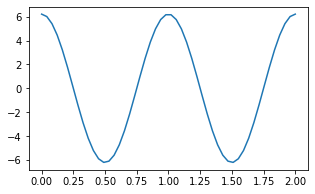

In [6]:
from derivative import FiniteDifference

fig,ax = plt.subplots(1, figsize=[5,3])
kind = FiniteDifference(k=1)
ax.plot(t, kind.d(x,t))

The second way is top use the functional interface and pass the kind of derivative as an argument.

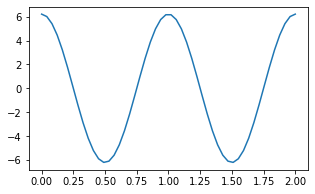

In [7]:
# Use the functional interface and pass the kind as an argument
from derivative import dxdt

fig,ax = plt.subplots(1, figsize=[5,3])
ax.plot(t, dxdt(x, t, "finite_difference", k=1))

# Examples

## Smooth Derivative

The first example is a sine function with Gaussian noise.

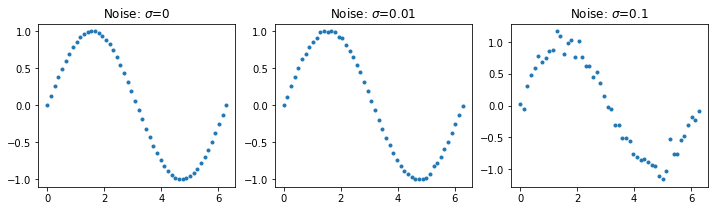

In [8]:
def noisy_sin(t, sigma):
    '''Sine with gaussian noise.'''
    np.random.seed(17)
    return np.sin(t) + np.random.normal(loc=0, scale=sigma, size=t.shape)

sigmas = [0, 0.01, 0.1]
fig, ax = plt.subplots(1, len(sigmas), figsize=[len(sigmas)*4, 3])

t = np.linspace(0, 2*np.pi, 50)
for axs, s in zip(ax, sigmas): 
    axs.scatter(t, noisy_sin(t, s))
    axs.set_title("Noise: $\sigma$={}".format(s))

### Finite differences

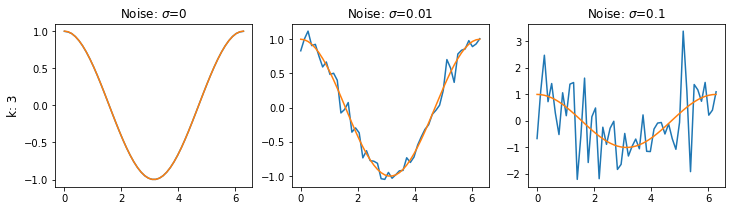

In [9]:
fd = derivative.FiniteDifference(3)
plot_example(fd, t, noisy_sin, np.cos, sigmas, 'k: 3')

### Savitzky-Golay filter

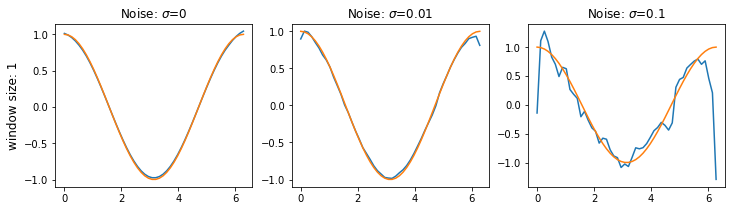

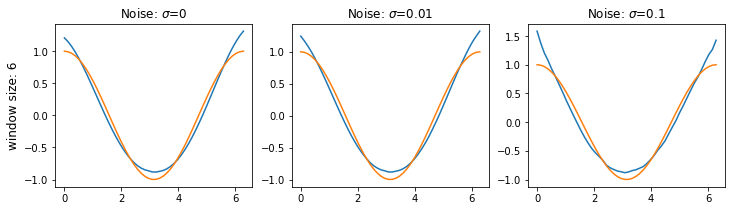

In [10]:
sg = derivative.SavitzkyGolay(left=.5, right=.5, order=2)
plot_example(sg, t, noisy_sin, np.cos, sigmas, 'window size: 1')

sg = derivative.SavitzkyGolay(left=3, right=3, order=3)
plot_example(sg, t, noisy_sin, np.cos, sigmas, 'window size: 6')

### Splines

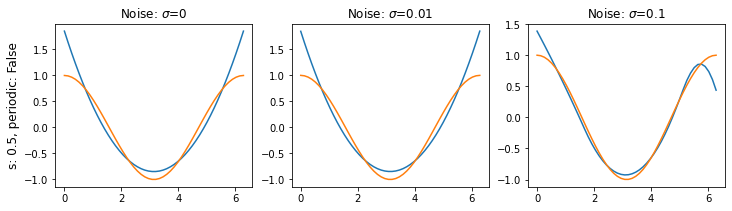

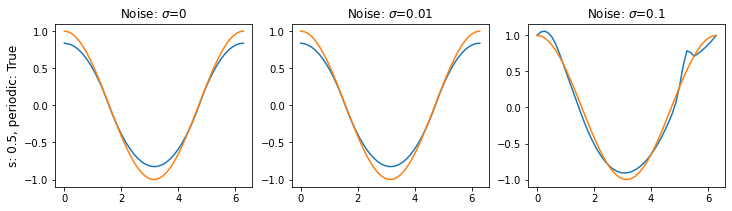

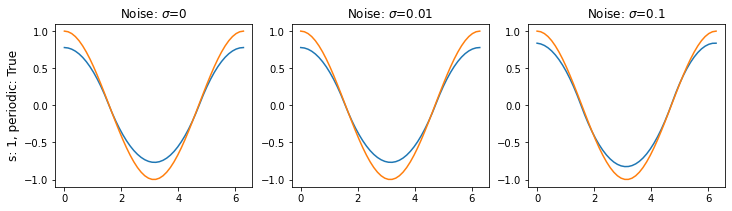

In [11]:
spl = derivative.Spline(.5)
plot_example(spl, t, noisy_sin, np.cos, sigmas, 's: 0.5, periodic: False')
spl = derivative.Spline(.5, periodic=True)
plot_example(spl, t, noisy_sin, np.cos, sigmas, 's: 0.5, periodic: True')
spl = derivative.Spline(1, periodic=True)
plot_example(spl, t, noisy_sin, np.cos, sigmas, 's: 1, periodic: True')

### Spectral method
Add your own filter!

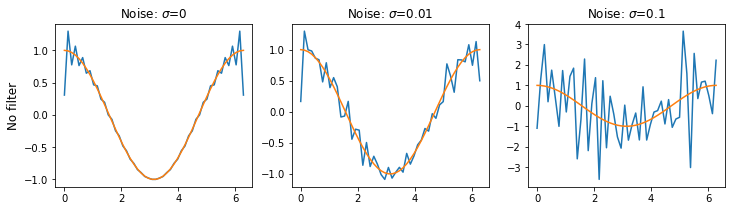

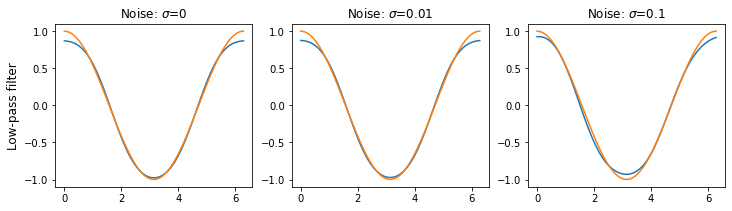

In [12]:
no_filter =  derivative.Spectral()
yes_filter = derivative.Spectral(filter=np.vectorize(lambda f: 1 if abs(f) < 0.5 else 0))

plot_example(no_filter, t, noisy_sin, np.cos, sigmas, 'No filter')
plot_example(yes_filter, t, noisy_sin, np.cos, sigmas, 'Low-pass filter')

### Trend-filtered

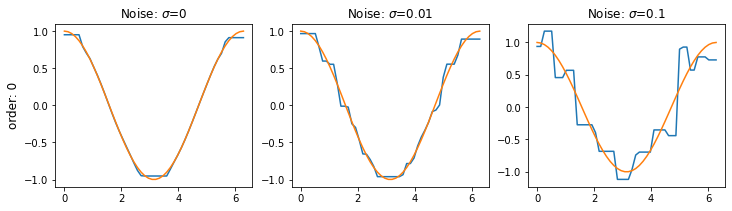

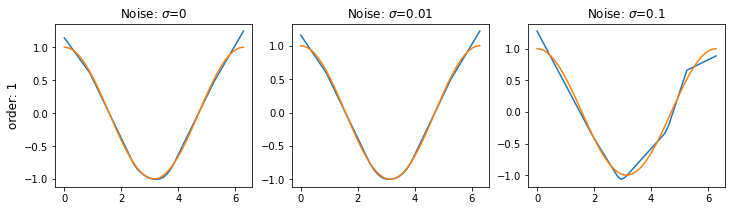

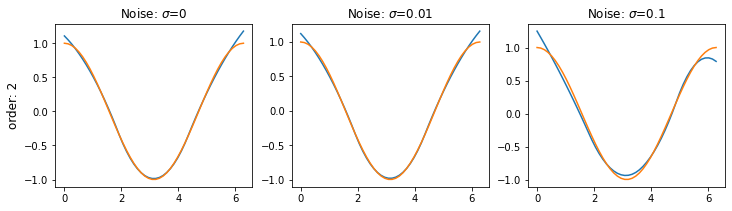

In [13]:
tvd =  derivative.TrendFiltered(alpha=1e-3, order=0, max_iter=1e6)
plot_example(tvd, t, noisy_sin, np.cos, sigmas, 'order: 0')

tvd =  derivative.TrendFiltered(alpha=1e-3, order=1, max_iter=1e6)
plot_example(tvd, t, noisy_sin, np.cos, sigmas, 'order: 1')

tvd =  derivative.TrendFiltered(alpha=1e-3, order=2, max_iter=1e6)
plot_example(tvd, t, noisy_sin, np.cos, sigmas, 'order: 2')

## Jump Derivative

The second example is the absolute value function with Gaussian noise.

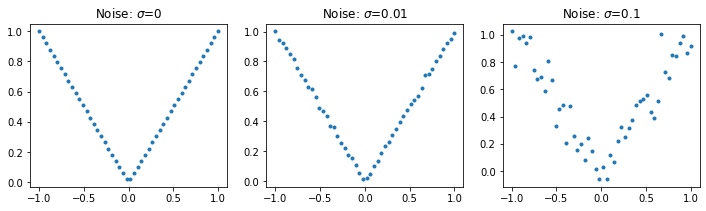

In [14]:
def noisy_abs(t, sigma):
    '''Sine with gaussian noise.'''
    np.random.seed(17)
    return np.abs(t) + np.random.normal(loc=0, scale=sigma, size=x.shape)

d_abs = lambda t: t/abs(t)

sigmas = [0, 0.01, 0.1]
fig, ax = plt.subplots(1, len(sigmas), figsize=[len(sigmas)*4, 3])

t = np.linspace(-1, 1, 50)
for axs, s in zip(ax, sigmas): 
    axs.scatter(t, noisy_abs(t, s))
    axs.set_title("Noise: $\sigma$={}".format(s))

### Finite differences

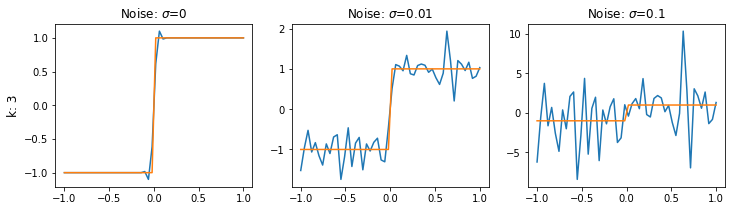

In [15]:
fd = derivative.FiniteDifference(k=3)
plot_example(fd, t, noisy_abs, d_abs, sigmas, 'k: 3')

### Savitzky-Galoy filter

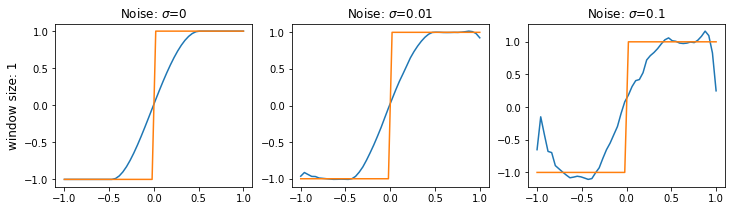

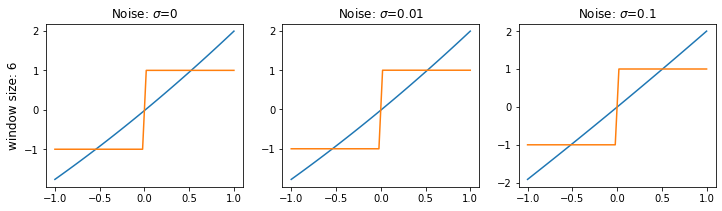

In [16]:
sg = derivative.SavitzkyGolay(left=.5, right=.5, order=2)
plot_example(sg, t, noisy_abs, d_abs, sigmas, 'window size: 1')

sg = derivative.SavitzkyGolay(left=3, right=3, order=3)
plot_example(sg, t, noisy_abs, d_abs, sigmas, 'window size: 6')

### Splines

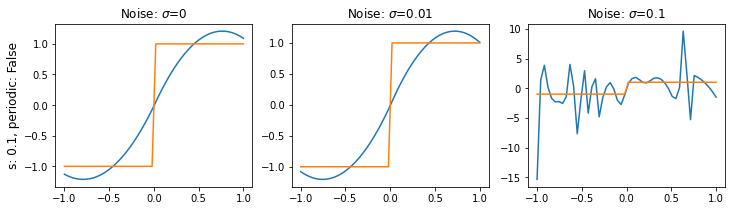

In [17]:
spl = derivative.Spline(.1, periodic=False)
plot_example(spl, t, noisy_abs, d_abs, sigmas, 's: 0.1, periodic: False')

### Spectral Method

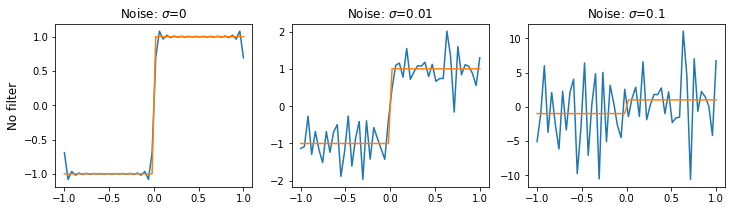

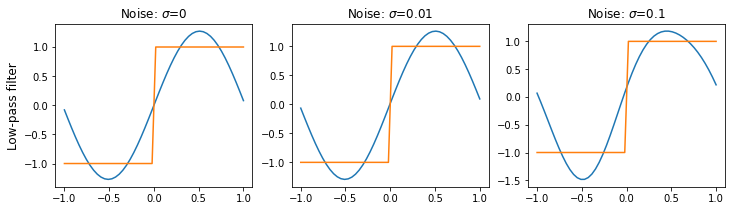

In [18]:
no_filter =  derivative.Spectral()
yes_filter = derivative.Spectral(filter=np.vectorize(lambda f: 1 if abs(f) < 1 else 0))

plot_example(no_filter, t, noisy_abs, d_abs, sigmas, 'No filter')
plot_example(yes_filter, t, noisy_abs, d_abs, sigmas, 'Low-pass filter')

### Trend-filtered

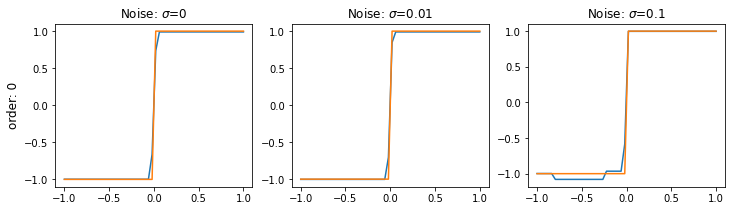

In [19]:
tvd =  derivative.TrendFiltered(alpha=1e-3, order=0, max_iter=1e5)
plot_example(tvd, t, noisy_abs, d_abs, sigmas, 'order: 0')